# Bachelor's thesis - Risk and Ratio Measures in Portfolio Optimization

## Markowitz Portfolio and Sharpe Ratio

### Author: Juraj Zelman (2021)

In [1]:
### Import libraries

import numpy as np
import pandas as pd
import scipy.stats as sp
import scipy.optimize as sc
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

In [2]:
#Importing stock data

# Printing the loading message
print()
print("Please wait, dataset is being downloaded!")

# Importing stocks' tickers
mytickers = ['MSFT', 'INTC', 'GS', 'BLK', 'GOOGL', 'T', 'AMZN', 'JNJ', 'GE',
       'XOM']
start_date = '2020-12-14'
now = datetime.now() # current date and time
end_date =  '2021-02-28'
sp500 = web.get_data_yahoo(mytickers,start_date, end_date,interval='w')['Adj Close']
sp500 = sp500.round(2)

# Printing the loading message
print()
print("Dataset succesfully loaded!")

sp500


Please wait, dataset is being downloaded!

Dataset succesfully loaded!


Symbols,MSFT,INTC,GS,BLK,GOOGL,T,AMZN,JNJ,GE,XOM
Date,,,,,,,,,,
2020-12-14,217.59,46.88,240.37,691.45,1726.22,28.40,3201.65,152.60,10.79,41.41
2020-12-21,221.73,46.50,254.30,699.74,1734.16,27.72,3172.69,150.59,10.64,40.32
2020-12-28,221.40,49.22,261.79,713.95,1752.64,27.78,3256.93,155.43,10.79,39.95
2021-01-04,218.61,51.02,287.97,748.50,1797.83,28.04,3182.70,158.06,11.33,44.06
2021-01-11,211.67,56.88,298.82,720.11,1727.62,28.68,3104.25,158.32,11.32,46.41
2021-01-18,224.91,55.97,287.29,727.32,1892.56,28.44,3292.23,161.53,11.10,45.97
2021-01-25,230.89,54.84,269.20,693.89,1827.36,28.15,3206.20,161.11,10.67,43.46
2021-02-01,241.09,57.47,291.37,718.69,2088.83,28.44,3352.15,162.42,11.39,48.41
2021-02-08,243.86,61.43,304.09,715.38,2095.03,28.32,3277.71,164.52,11.72,48.96


Now we can calculate mean normalized returns and the covariance matrix:

In [3]:
Returns = ((sp500/sp500.shift(1)))-1
Returns

Symbols,MSFT,INTC,GS,BLK,GOOGL,T,AMZN,JNJ,GE,XOM
Date,,,,,,,,,,
2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-21,0.019027,-0.008106,0.057952,0.011989,0.004600,-0.023944,-0.009045,-0.013172,-0.013902,-0.026322
2020-12-28,-0.001488,0.058495,0.029453,0.020308,0.010656,0.002165,0.026552,0.032140,0.014098,-0.009177
2021-01-04,-0.012602,0.036570,0.100004,0.048393,0.025784,0.009359,-0.022791,0.016921,0.050046,0.102879
2021-01-11,-0.031746,0.114857,0.037678,-0.037929,-0.039053,0.022825,-0.024649,0.001645,-0.000883,0.053336
2021-01-18,0.062550,-0.015999,-0.038585,0.010012,0.095472,-0.008368,0.060556,0.020275,-0.019435,-0.009481
2021-01-25,0.026588,-0.020189,-0.062968,-0.045963,-0.034451,-0.010197,-0.026131,-0.002600,-0.038739,-0.054601
2021-02-01,0.044177,0.047958,0.082355,0.035741,0.143086,0.010302,0.045521,0.008131,0.067479,0.113898
2021-02-08,0.011489,0.068906,0.043656,-0.004606,0.002968,-0.004219,-0.022207,0.012929,0.028973,0.011361


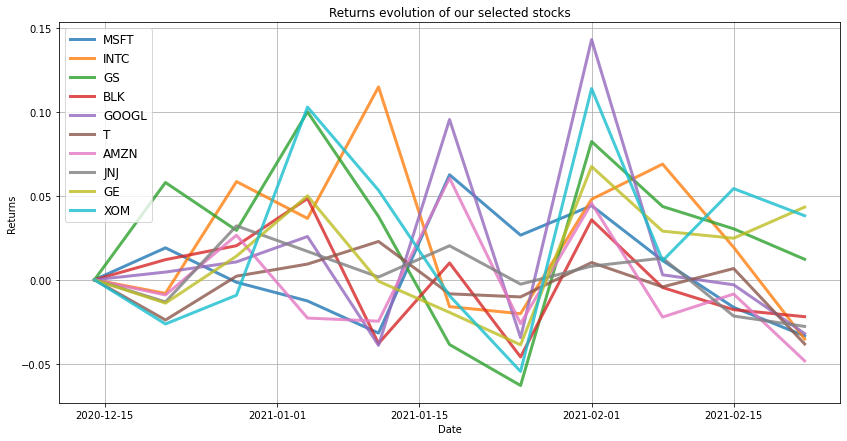

In [4]:
# Print price evolution graph
plt.figure(figsize = (14, 7))
for c in Returns.columns.values:
    Returns[c][0] = 0
    plt.plot(Returns.index, Returns[c], lw = 3, alpha = 0.8, label = c)
plt.legend(loc = "upper left", fontsize = 12)
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Returns evolution of our selected stocks")
plt.grid()
plt.show()

In [5]:
# Delete first row in Returns
Returns = Returns.drop(Returns.index[0])

# Calculation of mean returns
meanReturns = Returns.mean()

# Mean returns
meanReturns

Symbols
MSFT     0.006819
INTC     0.026650
GS       0.029216
BLK     -0.000185
GOOGL    0.017407
T       -0.003360
AMZN    -0.002898
JNJ      0.002696
GE       0.015568
XOM      0.027424
dtype: float64

In [6]:
# Calculation 
stdReturns = Returns.std()

stdReturns

Symbols
MSFT     0.030329
INTC     0.045705
GS       0.048064
BLK      0.029407
GOOGL    0.056026
T        0.016996
AMZN     0.033403
JNJ      0.018214
GE       0.032330
XOM      0.052861
dtype: float64

In [7]:
# Calculation 
skewReturns = Returns.skew()

skewReturns

Symbols
MSFT     0.476428
INTC     0.610599
GS      -0.449615
BLK      0.030741
GOOGL    1.495051
T       -0.757645
AMZN     0.832487
JNJ     -0.186083
GE       0.046723
XOM      0.406440
dtype: float64

In [13]:
kurtReturns = Returns.kurtosis()

kurtReturns

Symbols
MSFT    -0.418833
INTC    -0.231774
GS       0.046758
BLK     -0.688828
GOOGL    1.852515
T        0.753319
AMZN    -0.153570
JNJ     -0.564569
GE      -0.753729
XOM     -0.619859
dtype: float64

In [6]:
# Calculation of the covariance matrix
covMatrix = Returns.cov()

# Covariance matrix
covMatrix

Symbols,MSFT,INTC,GS,BLK,GOOGL,T,AMZN,JNJ,GE,XOM
Symbols,,,,,,,,,,
MSFT,0.001017,-0.000435,-0.000472,0.000307,0.001369,-0.000033,0.000850,0.000249,-0.000304,-0.000489
INTC,-0.000435,0.002246,0.001163,0.000130,-0.000028,0.000689,0.000055,0.000405,0.000422,0.001056
GS,-0.000472,0.001163,0.002481,0.001022,0.000724,0.000313,-0.000096,0.000086,0.001258,0.002033
BLK,0.000307,0.000130,0.001022,0.000961,0.001270,0.000092,0.000556,0.000311,0.000564,0.000793
GOOGL,0.001369,-0.000028,0.000724,0.001270,0.003457,0.000230,0.001758,0.000484,0.000718,0.001280
T,-0.000033,0.000689,0.000313,0.000092,0.000230,0.000320,0.000168,0.000163,0.000108,0.000487
AMZN,0.000850,0.000055,-0.000096,0.000556,0.001758,0.000168,0.001239,0.000391,-0.000023,0.000068
JNJ,0.000249,0.000405,0.000086,0.000311,0.000484,0.000163,0.000391,0.000368,-0.000005,-0.000008
GE,-0.000304,0.000422,0.001258,0.000564,0.000718,0.000108,-0.000023,-0.000005,0.001137,0.001599


In [7]:
# Calculation of the correlation matrix
corMatrix = Returns.corr()

# Correlation matrix
corMatrix

Symbols,MSFT,INTC,GS,BLK,GOOGL,T,AMZN,JNJ,GE,XOM
Symbols,,,,,,,,,,
MSFT,1.000000,-0.288034,-0.296999,0.310240,0.730145,-0.057068,0.757604,0.407019,-0.282827,-0.278486
INTC,-0.288034,1.000000,0.492760,0.088326,-0.010198,0.813380,0.033130,0.445568,0.264199,0.404207
GS,-0.296999,0.492760,1.000000,0.662092,0.247303,0.351633,-0.054739,0.089535,0.749268,0.740924
BLK,0.310240,0.088326,0.662092,1.000000,0.696797,0.166710,0.509882,0.523781,0.539634,0.464261
GOOGL,0.730145,-0.010198,0.247303,0.696797,1.000000,0.218344,0.849479,0.429328,0.362143,0.394954
T,-0.057068,0.813380,0.351633,0.166710,0.218344,1.000000,0.267047,0.476537,0.179838,0.494465
AMZN,0.757604,0.033130,-0.054739,0.509882,0.849479,0.267047,1.000000,0.579620,-0.019203,0.034968
JNJ,0.407019,0.445568,0.089535,0.523781,0.429328,0.476537,0.579620,1.000000,-0.007798,-0.007567
GE,-0.282827,0.264199,0.749268,0.539634,0.362143,0.179838,-0.019203,-0.007798,1.000000,0.860886


In [8]:
#---------------------------- Functions evaluating portfolio's performance -----------------------------------------

# Function evaluating the portfolio performance (output: return and standard deviation of the portfolio)
def portfolioPerformance(weights, meanReturns, covMatrix):
    # Input parameters are weights and portfolio's mean returns and covariance Matrix
    returns = np.sum(meanReturns*weights)*10  # Portfolio's returns
    std = np.sqrt(np.dot(weights.T, np.dot(covMatrix, weights)))*np.sqrt(10) # Portfolio's st. deviation
    return returns, std

# Function calculating the portfolio's returns
def portfolioReturn(weights, meanReturns, covMatrix):
        return portfolioPerformance(weights, meanReturns, covMatrix)[0]

# Function calculating the portfolio's variance
def portfolioVariance(weights, meanReturns, covMatrix):
    return portfolioPerformance(weights, meanReturns, covMatrix)[1]



#---------------------------- Optimization functions --------------------------------------------------------------

# Function that finds the portfolio with minimal variance for our set of stocks
def minimizeVariance(meanReturns, covMatrix, constraintSet):
    numAssets = len(meanReturns)      # Number of assets
    args = (meanReturns, covMatrix)   # arguments for the optimisation
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})    # Constraints for the optimization
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))  # Bounds for the optimisation
    # SLSQP optimization (scipy library), finds the portfolio with minimal variance
    result = sc.minimize(portfolioVariance, numAssets*[1./numAssets], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Function that finds the portfolio with minimal variance for given target
def efficientOpt(meanReturns, covMatrix, returnTarget, constraintSet):
    numAssets = len(meanReturns)     # Number of assets
    args = (meanReturns,covMatrix)   # Arguments for the optimisation
    
    # Constraints for the optimization
    constraints = ({'type':'eq', 'fun': lambda x: portfolioReturn(x, meanReturns, covMatrix) - returnTarget},
                    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))  # Bounds for the optimisation
    # SLSQP optimization (scipy library), finds the portfolio with minimal variance
    effOpt = sc.minimize(portfolioVariance, numAssets*[1./numAssets], args=args, 
                         method = 'SLSQP', bounds=bounds, constraints=constraints)
    return effOpt
    


#---------------------------- Output function ---------------------------------------------------------------------

# Function calculating the final results
def calculatedResults(meanReturns, covMatrix, constraintSet):
    
    # Min Volatility Portfolio
    minVol_Portfolio = minimizeVariance(meanReturns, covMatrix, constraintSet)
    minVol_returns, minVol_std = portfolioPerformance(minVol_Portfolio['x'], meanReturns, covMatrix)
    minVol_allocation = pd.DataFrame(minVol_Portfolio['x'], index=meanReturns.index, columns=['allocation'])
    minVol_allocation.allocation = [round(i,3) for i in minVol_allocation.allocation]
    
    # Efficient Frontier
    efficientList = []
    targetReturns = np.linspace(minVol_returns, max(meanReturns)*10, 100)
    for target in targetReturns:
        efficientList.append(efficientOpt(meanReturns, covMatrix, target, constraintSet)['fun'])

    return minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns

In [10]:
# Optimization of the Sharpe Ratio

# Function for negative SR
def negativeSR(weights, meanReturns, covMatrix, riskFreeRate = 0):
    pReturns, pStd = portfolioPerformance(weights, meanReturns, covMatrix)
    return -(pReturns - riskFreeRate)/pStd

# Function minimizing the negative Sharpe Ratio
def maxSR(meanReturns, covMatrix, riskFreeRate = 0, constraintSet=(0,1)):
    "Minimize the negative Sharpe Ratio, by altering the weights of the portfolio"
    numAssets = len(meanReturns)
    args = (meanReturns, covMatrix, riskFreeRate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = constraintSet
    bounds = tuple(bound for asset in range(numAssets))
    result = sc.minimize(negativeSR, numAssets*[1./numAssets], args = args,
                         method = 'SLSQP', bounds = bounds, constraints = constraints)
    return result

result = maxSR(meanReturns, covMatrix)
maxSR, maxSRWeights = -result['fun'],result['x']
maxSRReturn = portfolioReturn(maxSRWeights, meanReturns, covMatrix)
maxSRVStd = portfolioVariance(maxSRWeights, meanReturns, covMatrix)


print("Max Sharpe Ratio")
print(maxSR)
print(maxSRReturn)
print(maxSRVStd)
print([round(i,3) for i in maxSRWeights])

Max Sharpe Ratio
2.6161808640427773
0.17087076580155142
0.06531305543512969
[0.405, 0.258, 0.16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.175, 0.002]



Please wait, the optimization is being processed!

These are the weights for the portfolio with the minimal variance: 

         allocation
Symbols            
MSFT          0.209
INTC          0.000
GS            0.000
BLK           0.000
GOOGL         0.000
T             0.458
AMZN          0.000
JNJ           0.158
GE            0.174
XOM           0.000



Text(57, -3, 'Max Sharpe Ratio')

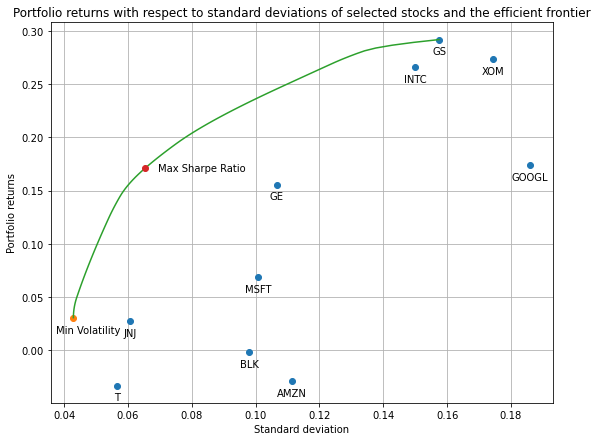

In [12]:
# Printing the loading message
print()
print("Please wait, the optimization is being processed!")
print()

# Setting initial contraint set for our weights' optimisation
constraintSet = (0,1)

# Calculating output including returns, standard dev. of portfolio with min. volatility and efficient frontier
minVol_returns, minVol_std, minVol_allocation, efficientList, targetReturns = calculatedResults(meanReturns, covMatrix, constraintSet)

# Printing the weights of the portfolio with the minimal variance
print('These are the weights for the portfolio with the minimal variance: ')
print()
print(minVol_allocation)
print()

# Plotting the results (start)
plt.figure(figsize = (9, 7))
plt.xlabel("Standard deviation")
plt.ylabel("Portfolio returns")
plt.title("Portfolio returns with respect to standard deviations of selected stocks and the efficient frontier")
plt.grid()

# Plotting returns and deviations of our stocks
x = np.sqrt(np.diag(covMatrix))*np.sqrt(10)
y = meanReturns*10

x
y
plt.plot(x, y, 'o')
for i in range(len(mytickers)):
    plt.annotate(mytickers[i],     
                 (x[i],y[i]),
                 textcoords = "offset points",
                 xytext = (0,-15),
                 ha = "center") 

# Plotting the efficient frontier and portfolio with min. volatility
plt.plot(minVol_std, minVol_returns, 'o')
plt.annotate('Min Volatility', 
            (minVol_std, minVol_returns),
            textcoords = "offset points",
            xytext = (15,-15),
            ha = "center")

plt.plot(efficientList, targetReturns)

# Plotting the max Sharpe Ratio point
plt.plot(maxSRVStd, maxSRReturn, 'o')
plt.annotate('Max Sharpe Ratio', 
            (maxSRVStd, maxSRReturn),
            textcoords = "offset points",
            xytext = (57,-3),
            ha = "center")


#plt.show()
#plt.savefig('test.png', bbox_inches='tight')
# End of plotting